<h2 style="color:crimson">Ejercicio</h2>

1. Crea un pipeline llamado `model` que primero transforme el espacio con un polinomio de grado 30 (sin incluir p0) y, posteriormente, considere la transformación de los datos con una regresión logística sin regularización (`LogisticRegression(penalty="none")`)
2. Realiza un _Bagging Classifer_ de `model` llamado `bagging_logreg` con `n_estimators=100` y `random_state=314`
3. Entrena `model` y `bagging_logreg` considerando `X` y `y` definido arriba
4. Grafica la función de decisión dada por `model` y por `bagging_logreg` ¿Qué observas?
5. Considerando un `f1_score` (dentro de `sklearn.metrics`), calcula el *f1-score* sobre el test set (`X_test`, `y_test`) considerando `model` y `bagging_logreg`. ¿Qué resultados arroja?

In [1]:
#Se importan todas las librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from numpy.random import randn, seed
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
import sys
sys.path.append("../Tareas/files")
import utils

%config InlineBackend.figure_format = "retina"

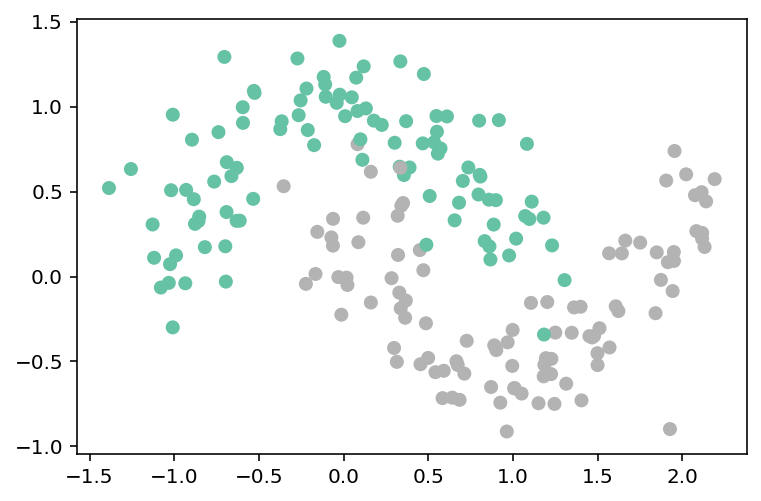

In [2]:
# Se generan los datos para evaluar
noise = 0.2
X, y = make_moons(200, noise=noise, random_state=2718)
X_test, y_test = make_moons(40, noise=noise,
                            random_state=31415)
plt.scatter(*X.T, c=y, cmap="Set2")

In [3]:
# Se crea el Pipeline del modelo
model = Pipeline(steps=[
    ("polinomio", PolynomialFeatures(degree = 30, include_bias = False)),
    ("transform", LogisticRegression(solver = 'lbfgs', penalty = 'none'))
])


In [4]:
# Se evalua el Bagging con el modelo no entrenado
bagging_logreg = BaggingClassifier(model, n_estimators=100,
                                  bootstrap=True, max_samples=100, n_jobs=-1,
                                  oob_score=True, random_state=314)
bagging_logreg.fit(X, y)
bagging_logreg.oob_score_

0.945

In [5]:
# Sentrena el modelo
model.fit(X, y)

C:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('polinomio',
                 PolynomialFeatures(degree=30, include_bias=False,
                                    interaction_only=False, order='C')),
                ('transform',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

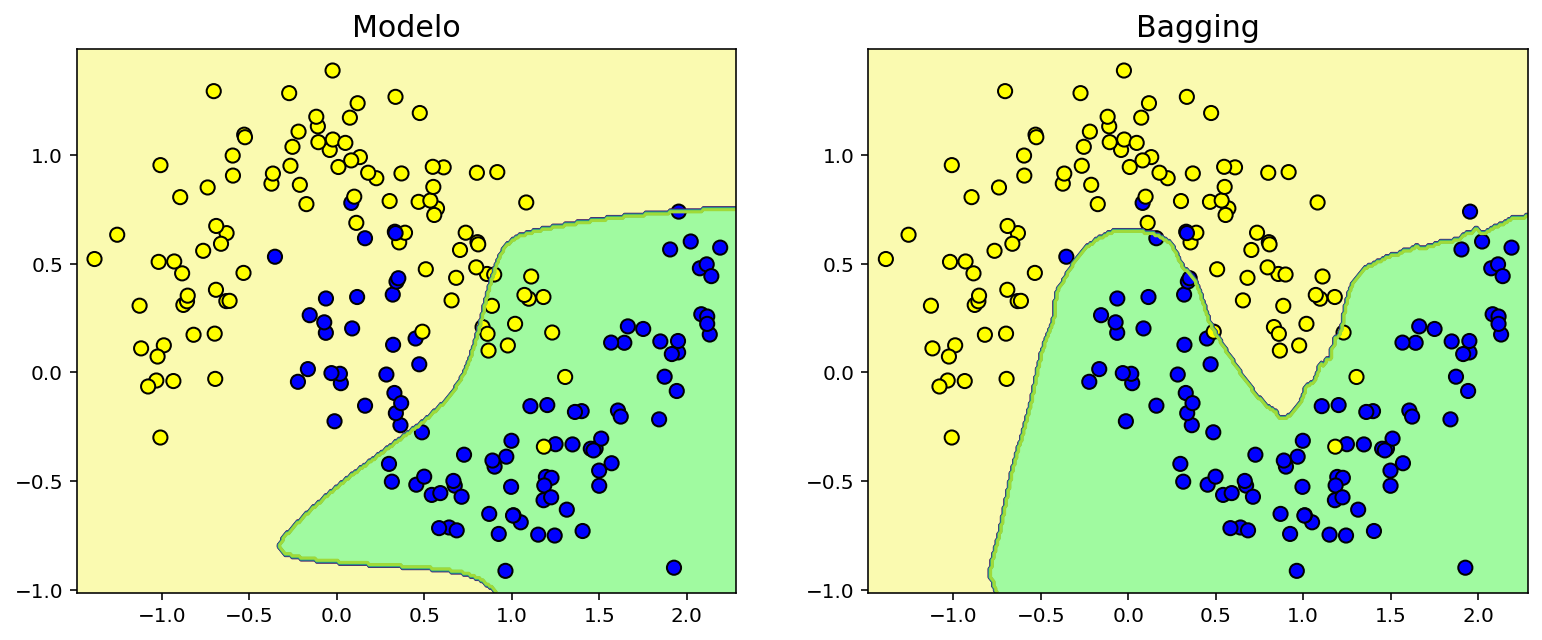

In [6]:
# Se grafica model y Bagging
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
ax[0].set_title("Modelo", fontsize = 15)
ax[1].set_title("Bagging", fontsize = 15)
utils.plot_classf_model(X, y, model, ax=ax[0], contour=True)
utils.plot_classf_model(X, y, bagging_logreg, ax=ax[1], contour=True)

En las gráficas se observa que con Bagging se obtiene una divición de epacios más acorde al comportamienteo de los puntos.

In [7]:
# Se Hace la prueba de predicción para el modelo y para bagging para generar los F1 Scoring
yhat_m = model.predict(X_test)
yhat_b = bagging_logreg.predict(X_test)


In [8]:
f1_score(y_test, yhat_m)

0.7567567567567567

In [9]:
f1_score(y_test, yhat_b)

0.9500000000000001

Al hacer la comparación, los resultados con Bagging se logra un mejor score.